In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from find_eyes import find_eyes
import pandas as pd

In [9]:
#COMPUTE ACCURACY FOR PY-FEAT METHOD
# df = pd.read_csv("pyfeat.csv")
df = pd.DataFrame.from_dict({'images': ['happy.png', 'sad.png', 'normal.png'], 'pyfeat': ['happiness', 'surprise', 'neutral']})
df["accurate"] = 0
df

,images,pyfeat,accurate
0,happy.png,happiness,0
1,sad.png,surprise,0
2,normal.png,neutral,0


In [10]:
for row in range(len(df)):
    emotion = df.loc[row, 'pyfeat']
    name = df.loc[row, 'images']
    if ('happiness' in emotion) and ('happy' in name):
         df.loc[row, 'accurate'] = 1
    if ('sadness' in emotion) and ('sad' in name):
         df.loc[row, 'accurate'] = 1
    if ('neutral' in emotion) and ('normal' in name):
         df.loc[row, 'accurate'] = 1

In [11]:
df

,images,pyfeat,accurate
0,happy.png,happiness,1
1,sad.png,surprise,0
2,normal.png,neutral,1


In [14]:
happy_df = df[df['images'].str.contains("happy")]
sad_df = df[df['images'].str.contains("sad")]
normal_df = df[df['images'].str.contains("normal")]

In [21]:
happy_accuracy = sum(happy_df['accurate']) / len(happy_df['accurate'])
sad_accuracy = sum(sad_df['accurate']) / len(sad_df['accurate'])
normal_accuracy = sum(normal_df['accurate']) / len(normal_df['accurate'])
pyfeat_accuracy = sum(df['accurate']) / len(df['accurate'])

In [17]:
happy_accuracy

1.0

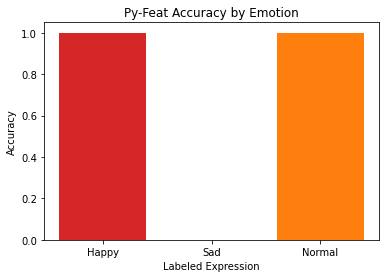

In [30]:
fig, ax = plt.subplots()

names = ['Happy', 'Sad', 'Normal']
counts = [happy_accuracy, sad_accuracy, normal_accuracy]
bar_colors = ['tab:red', 'tab:blue','tab:orange']

ax.bar(names, counts, label=names, color=bar_colors)

ax.set_ylabel('Accuracy')

ax.set_xlabel('Labeled Expression')
ax.set_title('Py-Feat Accuracy by Emotion')

plt.show()

In [9]:
# SAME THING BUT WITH OUR NEW METHOD
df = pd.DataFrame.from_dict({'images': ['happy.png', 'sad.png', 'normal.png'], 'pyfeat': ['happiness', 'surprise', 'neutral']})
df["accurate"] = 0
df

,images,pyfeat,accurate
0,happy.png,happiness,0
1,sad.png,surprise,0
2,normal.png,neutral,0


In [10]:
for row in range(len(df)):
    emotion = df.loc[row, 'pyfeat']
    name = df.loc[row, 'images']
    if ('happiness' in emotion) and ('happy' in name):
         df.loc[row, 'accurate'] = 1
    if ('sadness' in emotion) and ('sad' in name):
         df.loc[row, 'accurate'] = 1
    if ('neutral' in emotion) and ('normal' in name):
         df.loc[row, 'accurate'] = 1

In [11]:
df

,images,pyfeat,accurate
0,happy.png,happiness,1
1,sad.png,surprise,0
2,normal.png,neutral,1


In [14]:
happy_df = df[df['images'].str.contains("happy")]
sad_df = df[df['images'].str.contains("sad")]
normal_df = df[df['images'].str.contains("normal")]

In [21]:
happy_accuracy = sum(happy_df['accurate']) / len(happy_df['accurate'])
sad_accuracy = sum(sad_df['accurate']) / len(sad_df['accurate'])
normal_accuracy = sum(normal_df['accurate']) / len(normal_df['accurate'])
new_accuracy = sum(df['accurate']) / len(df['accurate'])

In [17]:
happy_accuracy

1.0

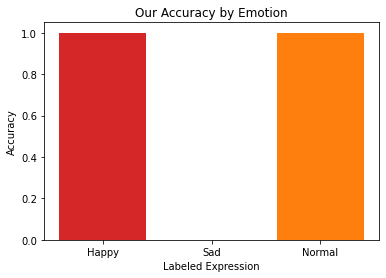

In [31]:
fig, ax = plt.subplots()

names = ['Happy', 'Sad', 'Normal']
counts = [happy_accuracy, sad_accuracy, normal_accuracy]
bar_colors = ['tab:red', 'tab:blue','tab:orange']

ax.bar(names, counts, label=names, color=bar_colors)

ax.set_ylabel('Accuracy')

ax.set_xlabel('Labeled Expression')
ax.set_title('Our Accuracy by Emotion')

plt.show()

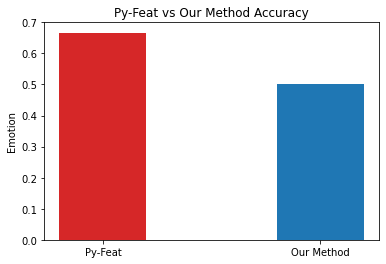

In [27]:
# Overall Accuracy Comparison

fig, ax = plt.subplots()

names = ['Py-Feat', 'Our Method']
counts = [pyfeat_accuracy, new_accuracy]
bar_colors = ['tab:red', 'tab:blue']

ax.bar(names, counts, label=names, color=bar_colors, width=0.4)

ax.set_ylabel('Emotion')
ax.set_title('Py-Feat vs Our Method Accuracy')

plt.show()